In [2]:
# Import libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Cleaning and Preprocessing

In [3]:
# Read dataset, drop missing values
df = pd.read_csv('data.csv')
df = df.dropna()
df = df.drop(columns=['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
    'fractal_dimension_se', 'Unnamed: 32'])
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# Selected column names for encoding an scaling
target_column = 'diagnosis'
numerical_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer

# Initialize encoder, scaler, and normalizer
encoder = LabelEncoder()
scaler = StandardScaler()
normalizer = Normalizer()

# Encode the target column
df[target_column] = encoder.fit_transform(df[target_column])

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Normalize the numerical columns to be between 0 and 1
df[numerical_columns] = normalizer.fit_transform(df[numerical_columns])

ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required by StandardScaler.

In [ ]:
# Output the transformed data to .csv
df.to_csv('data_refined.csv', index = False)
print(df)
print((df["diagnosis"] == 1).sum())

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1     0.116224     -0.219652        0.134538   0.104286   
1            1     0.382109     -0.073847        0.352066   0.398582   
2            1     0.287346      0.082970        0.284911   0.283525   
3            1    -0.061014      0.020134       -0.047031  -0.060662   
4            1     0.353083     -0.232353        0.358383   0.368400   
..         ...          ...           ...             ...        ...   
564          1     0.324110      0.110771        0.316402   0.359863   
565          1     0.314620      0.384799        0.298210   0.318124   
566          1     0.196726      0.573012        0.188432   0.161898   
567          1     0.174741      0.222089        0.188447   0.164939   
568          0    -0.283397      0.191469       -0.284335  -0.211214   

     compactness_mean  concavity_mean  concave points_mean  radius_worst  \
0            0.347860        0.281049             0.268294 

Data Visualization

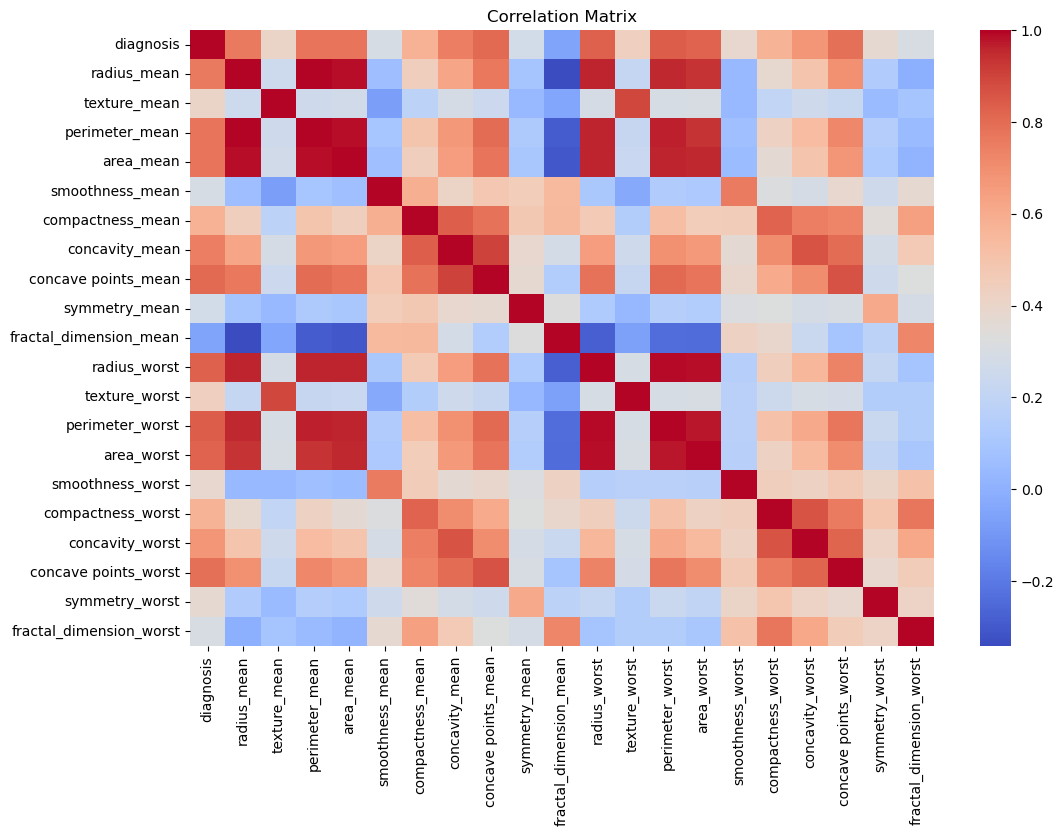

In [ ]:
# Correlation matrix
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

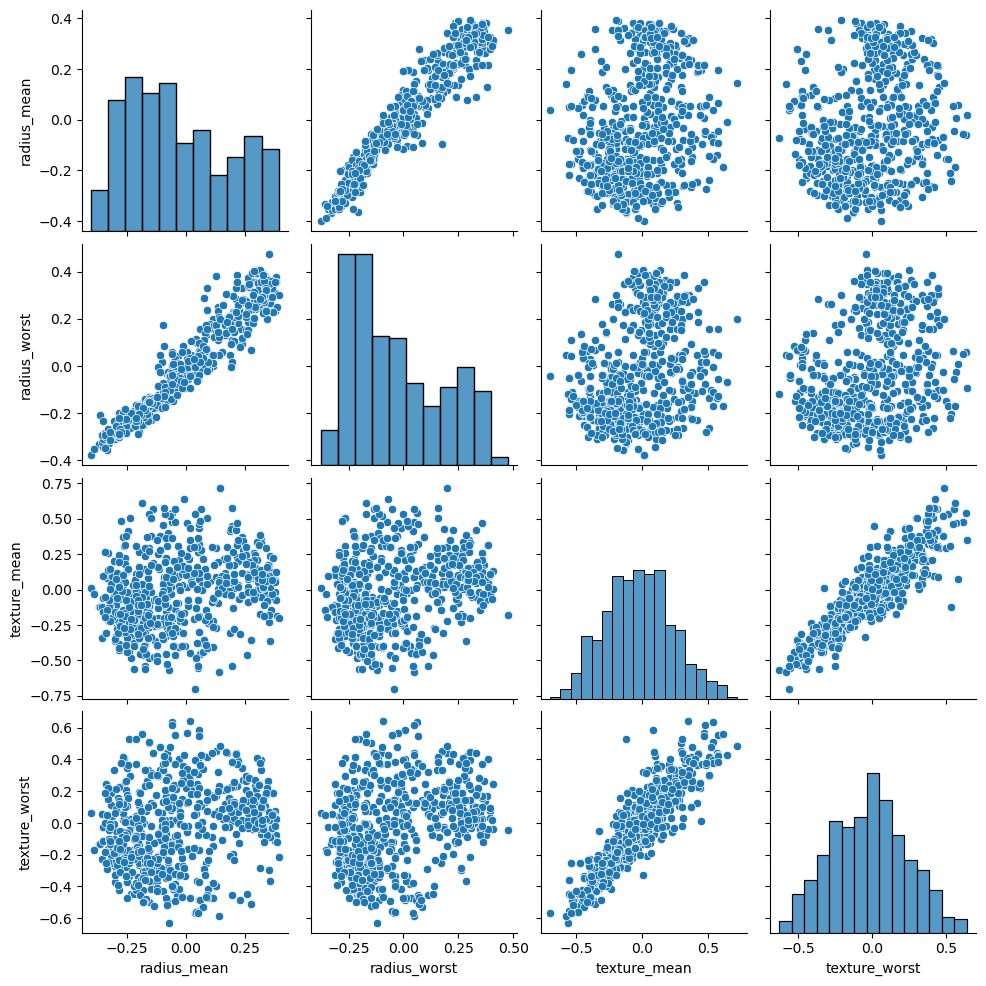

In [ ]:
# Pair plots
selected_features = ['radius_mean', 'radius_worst', 'texture_mean', 'texture_worst' ]
sns.pairplot(df[selected_features])
plt.show()

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

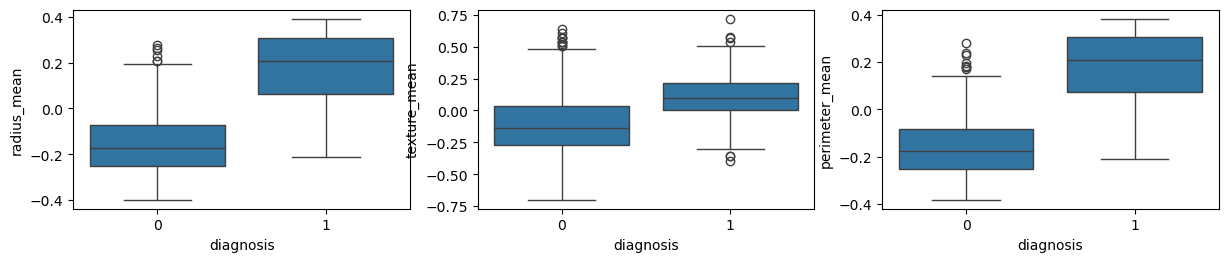

In [ ]:
# Box plots
plt.figure(figsize = (20, 15))
plt.subplot(5, 4, 1)
sns.boxplot(data = df, x = 'diagnosis', y = 'radius_mean')
plt.subplot(5, 4, 2)
sns.boxplot(data = df, x = 'diagnosis', y = 'texture_mean')
plt.subplot(5, 4, 3)
sns.boxplot(data = df, x = 'diagnosis', y = 'perimeter_mean')

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

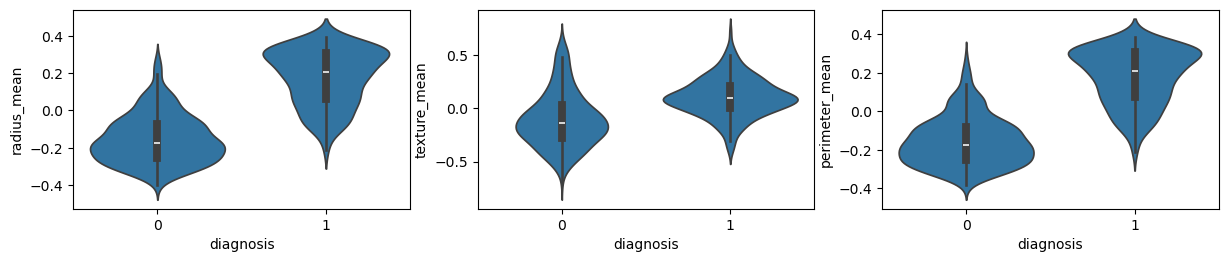

In [ ]:
# Violin plots
plt.figure(figsize = (20, 15))
plt.subplot(5, 4, 1)
sns.violinplot(data = df, x = 'diagnosis', y = 'radius_mean')
plt.subplot(5, 4, 2)
sns.violinplot(data = df, x = 'diagnosis', y = 'texture_mean')
plt.subplot(5, 4, 3)
sns.violinplot(data = df, x = 'diagnosis', y = 'perimeter_mean')

In [ ]:
# For my model, I'll check to see whats most correlated with diagnosis
corr = df.corr()
row = corr.iloc[0].sort_values(ascending=False)
print(row)

diagnosis                  1.000000
perimeter_worst            0.840955
radius_worst               0.830065
area_worst                 0.824922
concave points_mean        0.810138
concave points_worst       0.788337
perimeter_mean             0.777267
area_mean                  0.774944
radius_mean                0.760103
concavity_mean             0.745758
concavity_worst            0.677547
compactness_mean           0.577719
compactness_worst          0.573979
texture_worst              0.434337
texture_mean               0.403067
smoothness_worst           0.384602
symmetry_worst             0.371397
fractal_dimension_worst    0.298121
smoothness_mean            0.293661
symmetry_mean              0.276492
fractal_dimension_mean    -0.048344
Name: diagnosis, dtype: float64


In [ ]:
# For now drop anything below 0.30 positive correlation
df = df.drop(columns = ['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'fractal_dimension_worst'])
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [ ]:
# Split the data into sets for our models
from sklearn.model_selection import train_test_split

X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]
y = df['diagnosis']

# First get our training sets and set aside 20% for test and validaiton
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20)

# Split temp sets into 2
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [ ]:
# Import our models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

KNN Classifier

In [ ]:
# Try KNN as our first model
results = {}

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_val, y_val)

In [ ]:
best_k = max(results, key = results.get)
score = results[best_k]

print(f"The best n_neighbors is {best_k}, with an accuracy of {score}")

The best n_neighbors is 1, with an accuracy of 1.0


In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.9824561403508771


Random Forest Classifier

In [ ]:
# Tuning multiple hyperparams, so I use gridsearch to test the two along with cross validation
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()
param_grid = {
    "n_estimators" : list(range(1, 51, 1)),
    "criterion" : ["gini", "entropy", "log_loss"]
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print(f"Using GridSearch, the best params are {grid_search.best_params_}, with a best CV accuracy of {grid_search.best_score_}")


Using GridSearch, the best params are {'criterion': 'entropy', 'n_estimators': 49}, with a best CV accuracy of 0.9626373626373625


In [ ]:
# Build out final model on our test data
rf_model = RandomForestClassifier(n_estimators=grid_search.best_params_["n_estimators"], criterion=grid_search.best_params_["criterion"])
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(rf_model.score(X_test, y_test))

0.9824561403508771


Support Vector Classifier

In [ ]:
# Tuning multiple hyperparams, so I use gridsearch to test the two along with cross validation
from sklearn.model_selection import GridSearchCV
svc = SVC()
param_grid = {
    "C" : [0.5, 1.0],
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "gamma" : ["scale", "auto"]
}

grid_search = GridSearchCV(svc, param_grid=param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print(f"Using GridSearch, the best params are {grid_search.best_params_}, with a best CV accuracy of {grid_search.best_score_}")


Using GridSearch, the best params are {'C': 0.5, 'gamma': 'scale', 'kernel': 'sigmoid'}, with a best CV accuracy of 0.9692307692307693


In [ ]:
svc = SVC(C = 0.5, gamma = "scale", kernel = "sigmoid")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))

0.9824561403508771


Regression

In [127]:
# Read the dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
insurance = pd.read_csv("insurance.csv")
insurance = insurance.dropna()
# For now encoding "region" with label encoder, would suit better with one hot since theres no order to them
cat_cols = ["sex", "smoker", "region"]
cont_cols = ["age", "bmi", "children"]

encoder = LabelEncoder()
scaler = StandardScaler()

for cat in cat_cols:
    insurance[cat] = encoder.fit_transform(insurance[cat])

insurance[cont_cols] = scaler.fit_transform(insurance[cont_cols])


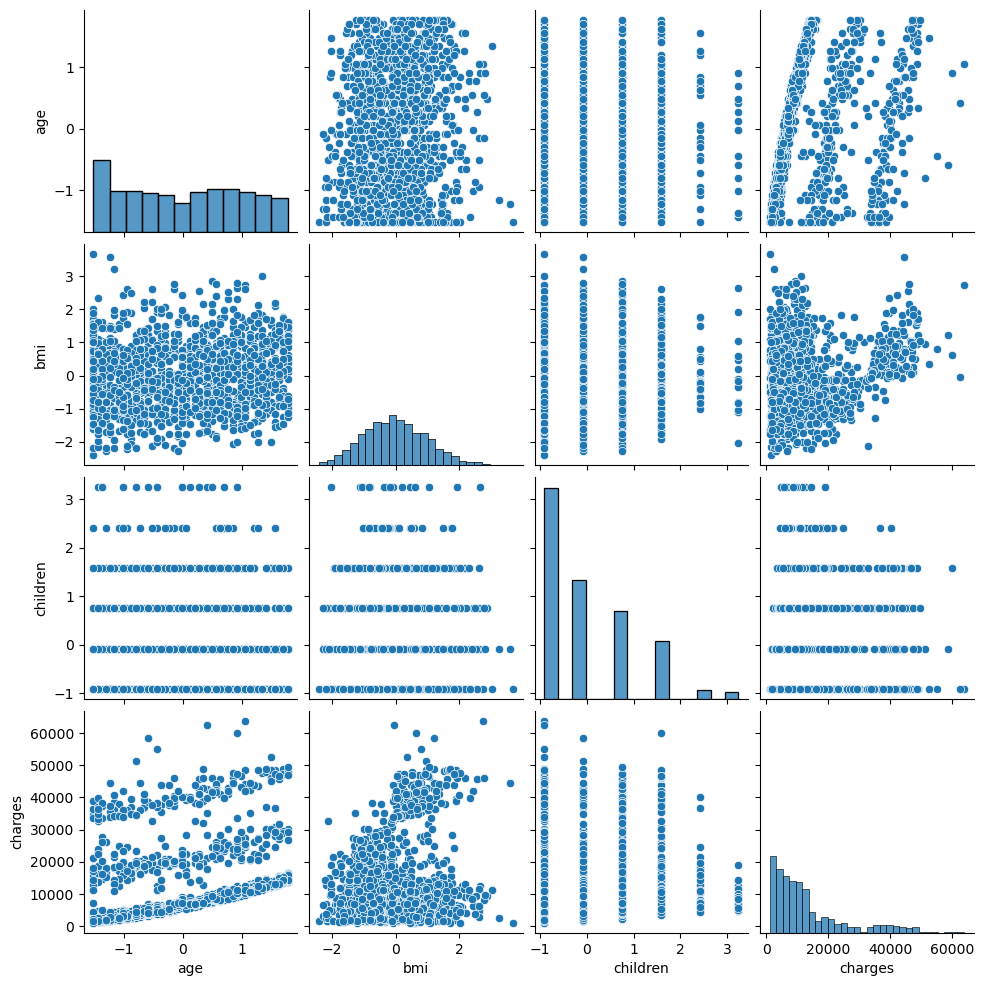

In [128]:
import seaborn as sns
select_features = ["age", "bmi", "children", "charges"]
sns.pairplot(insurance[select_features])
plt.show()

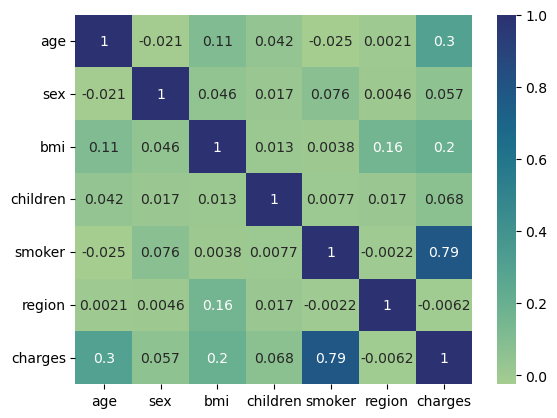

In [129]:
corr = insurance.corr()
sns.heatmap(corr, cmap = "crest", annot = True)
plt.show()


In [130]:
from sklearn.model_selection import train_test_split
# Dropping insignificant variables
X = insurance.drop(columns = ["charges", "region", "sex", "children"])
y = insurance["charges"]

KNN Regression

In [131]:
import sklearn.model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
results = 0
best_score = 0
kfold = KFold(n_splits=5, shuffle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for n in range(1,30):
    fold_scores = []
    for train_index, val_index in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]   
        knn = KNeighborsRegressor(n_neighbors=n)
        knn.fit(X_train_fold, y_train_fold)
        score = knn.score(X_val_fold, y_val_fold)
        fold_scores.append(score)

    avg_score = sum(fold_scores)/len(fold_scores)
    if avg_score > best_score:
        best_score = avg_score
        best_k = n

print(f"The best n_neighbors is {best_k} with a score of {best_score}")

The best n_neighbors is 10 with a score of 0.8354263537149882


In [132]:
# Now create a model with  best hyperparams
knn = KNeighborsRegressor(n_neighbors = best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(best_k)

0.8075413455881519
10


Random Forest

In [133]:
# Try K fold with number different number of estimators
from sklearn.ensemble import RandomForestRegressor
results = 0
best_score = 0
kfold = KFold(n_splits=5, shuffle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for n in range(50,200,10):
    fold_scores = []
    for train_index, val_index in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]   
        forest = RandomForestRegressor(n_estimators=n, criterion="friedman_mse")
        forest.fit(X_train_fold, y_train_fold)
        score = forest.score(X_val_fold, y_val_fold)
        fold_scores.append(score)

    avg_score = sum(fold_scores)/len(fold_scores)
    if avg_score > best_score:
        best_score = avg_score
        best_trees = n

print(f"The best n_estimators is {best_trees} with a score of {best_score}")
# Only issue is that I want to test different criterion as well

The best n_estimators is 140 with a score of 0.8178033457877059


In [134]:
# Now create a model with  best hyperparams
forest = RandomForestRegressor(n_estimators=best_trees)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
print(best_trees)

0.813258243749578
140


In [135]:
# Tuning multiple hyperparams, n_estimators and criterion
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestRegressor()
param_grid = {
    "n_estimators" : [100, 150, 200, 250, 300],
    "criterion" : ['squared_error', 'absolute_error', 'friedman_mse']
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv = 5, scoring = "r2")
grid_search.fit(X_train, y_train)

print(f"Using GridSearch, the best params are {grid_search.best_params_}, with a best CV accuracy of {grid_search.best_score_}")

Using GridSearch, the best params are {'criterion': 'absolute_error', 'n_estimators': 150}, with a best CV accuracy of 0.8146912151681012


Support Vector Regressor


In [ ]:
# Iterating through many different params and SVR consistently underperforms compared to KNN and Forest
from sklearn.svm import SVR
svr = SVR()
param_grid = {
    "kernel": ['linear', 'rbf'],
    "C": [250, 500, 750, 1000, 1250, 1500],
    "epsilon": [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(svr, param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)
print(f"Using GridSearch, the best params are {grid_search.best_params_}, with a best CV accuracy of {grid_search.best_score_}")

Using GridSearch, the best params are {'C': 1500, 'epsilon': 10, 'kernel': 'rbf'}, with a best CV accuracy of 0.7679979742720767
